# Using AnalyzeID


Textract AnalyzeID is an API dedicated to processing ID documents such as drivers' licenses and passports. It is different than other Amazon Textract services because it does not have an asynchronous API and supports only single-page image of ID documents.


## Installation

To begin, install the `amazon-textract-textractor` package using pip.

`pip install amazon-textract-textractor`

There are various sets of dependencies available to tailor your installation to your use case. The base package will have sensible default, but you may want to install the PDF extra dependencies if you workflow uses PDFs with `pip install amazon-textract-textractor[pdf]`. You can read more on extra dependencies [in the documentation](https://aws-samples.github.io/amazon-textract-textractor/installation.html)

## Calling Textract

In [1]:
from textractor import Textractor

extractor = Textractor(profile_name="default")

document = extractor.analyze_id(
    file_source="../../../tests/fixtures/fake_id.png",
    save_image=True,
)

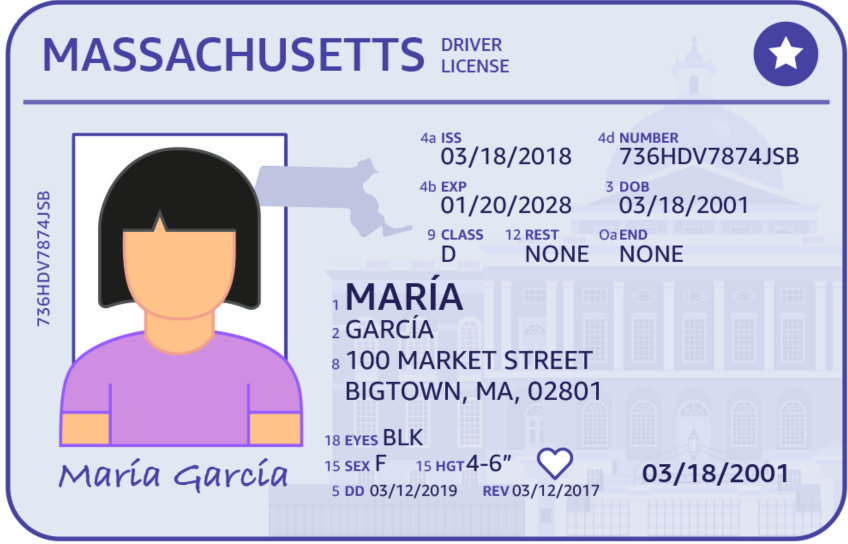

In [3]:
document.images[0]

## Parsing the output

AnalyzeID is a simple API that is only synchronous and only returns specific keys that are predefined in the `constants.py` file.

In [ ]:
from textractor.data.constants import AnalyzeIDFields

[f.value for f in AnalyzeIDFields]

Note that some of that `PLACE_OF_BIRTH` is specific to passports. An `IdentityDocument` object can be used like a dictionary, making it very simple to use.

In [ ]:
document.identity_documents[0]["FIRST_NAME"] + " " + document.identity_documents[0]["LAST_NAME"]

In [ ]:
{f.value:document.identity_documents[0][f.value] for f in AnalyzeIDFields}

## Conclusion

AnalyzeID is an API that is very easy to use and Textractor helps you use it by providing an `Enum` of available keys and a simple `dict`-like interface. 